   #                      COVID-19 DATA ANALYSIS

# Gathering Data

In [229]:
# import python libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")

In [230]:
# Grab Worldwide covid-19 data website
page = requests.get("https://www.worldometers.info/coronavirus/")

#Check out whether the website can be accessible for scraping
page.status_code

200

In [231]:
# Parse Worldwide data from 
soup = BeautifulSoup(page.content, "lxml")
items = soup.find("tbody")


In [232]:

data = [item.text for item in items.find_all('td')]
data_chunksize = [data[i:i + 13] for i in range(0, len(data), 13)]
data_chunksize = data_chunksize[8:]
country = [i[0] for i in data_chunksize]
total_cases = [i[1] for i in data_chunksize]
new_cases = [i[2] for i in data_chunksize]

total_deaths = [i[3] for i in data_chunksize]
new_deaths = [i[4] for i in data_chunksize]
total_recovered = [i[5] for i in data_chunksize]

active_cases = [i[6] for i in data_chunksize]
critical = [i[7] for i in data_chunksize]
total_cases_per_1M = [i[8] for i in data_chunksize]

deaths_per_1M = [i[9] for i in data_chunksize]
total_tests = [i[10] for i in data_chunksize]
tests_per_1M = [i[11] for i in data_chunksize]
continent = [i[12] for i in data_chunksize]


In [233]:
worldwide = pd.DataFrame({"Country" : country,
                          "Continent" :continent,
                          "Total Cases" : total_cases,
                          "New Cases" : new_cases,
                          "Total Deaths" : total_deaths,
                          "New Deaths" : new_deaths,
                          "Total Recovered" : total_recovered,
                          "Active Cases" : active_cases, 
                          "Serious/Critical" : critical, 
                          "Total Cases/1M pop" : total_cases_per_1M,
                          "Deaths/1M pop" : deaths_per_1M,
                          "Total Tests" : total_tests, 
                          "Tests/1M pop" : tests_per_1M})

In [234]:
# Grab USA covid-19 data website
page_1 = requests.get("https://www.worldometers.info/coronavirus/country/us/")

# Parse USA data from HTML file
soup_1 = BeautifulSoup(page_1.content, "lxml")
items_1 = soup_1.find("tbody")

data_1 = [item_1.text.replace('\n', "").strip() for item_1 in items_1.find_all('td')]
data_chunksize_1 = [data_1[i:i + 11] for i in range(0, len(data_1), 11)]

usa_state = [i[0] for i in data_chunksize_1]
total_cases_1 = [i[1] for i in data_chunksize_1]
new_cases_1 = [i[2] for i in data_chunksize_1]

total_deaths_1 = [i[3] for i in data_chunksize_1]
new_deaths_1 = [i[4] for i in data_chunksize_1]
active_cases_1 = [i[5] for i in data_chunksize_1]

total_cases_per_1M_1 = [i[6] for i in data_chunksize_1]
deaths_per_1M_1 = [i[7] for i in data_chunksize_1]

total_tests_1 = [i[8] for i in data_chunksize_1]
tests_per_1M_1 = [i[9] for i in data_chunksize_1]


In [235]:
usa = pd.DataFrame({"USA State" : usa_state,
                  "Total Cases" : total_cases_1,
                  "New Cases" : new_cases_1,
                  "Total Deaths" : total_deaths_1,
                  "New Deaths" : new_deaths_1,
                  "Active Cases" : active_cases_1,  
                  "Total Cases/1M pop" : total_cases_per_1M_1,
                  "Deaths/1M pop" : deaths_per_1M_1,
                  "Total Tests" : total_tests_1, 
                  "Tests/1M pop" : tests_per_1M_1})

## Assessing Data

In [236]:
# Display the first 5 rows of the worldwide data
worldwide.head()

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"929,841","+4,609","52,843",+650,"110,504","766,494","15,097","2,809",160,"5,087,985","15,371"
1,Spain,Europe,"223,759","+3,995","22,902",+378,"95,708","105,149","7,705","4,786",490,"930,230","19,896"
2,Italy,Europe,"195,351","+2,357","26,384",+415,"63,120","105,847","2,102","3,231",436,"1,707,743","28,245"
3,France,Europe,"159,828",,"22,245",,"43,493","94,090","4,870","2,449",341,"463,662","7,103"
4,Germany,Europe,"155,418",+419,"5,805",+45,"109,800","39,813","2,908","1,855",69,"2,072,669","24,738"


In [237]:

worldwide.tail()

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
207,Sao Tome and Principe,Africa,4,,,,,4,,18,,19,87
208,Anguilla,North America,3,,,,1,2,,200,,,
209,Saint Pierre Miquelon,North America,1,,,,,1,,173,,,
210,Yemen,Asia,1,,,,1,0,,0.03,,120,4
211,China,Asia,"82,816",+12,"4,632",,"77,346",838,49,58,3,,


In [238]:
# Display the first 5 rows of the USA data
usa.head()

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA Total,"929,841","+4,609","52,843",+650,"766,494","2,809",160,"5,087,985","15,371"
1,New York,"277,445",,"21,728",+437,"224,499","14,142","1,108","730,656","37,243"
2,New Jersey,"102,196",,"5,617",,"95,308","11,506",632,"205,921","23,184"
3,Massachusetts,"50,969",,"2,556",,"40,295","7,462",374,"215,213","31,509"
4,California,"41,338",+526,"1,618",+24,"36,383","1,056",41,"494,173","12,623"


In [239]:
# Number of countries and USA states affected by covid-19 respectively
print("The number worldwide countries in this dataset is {}".format(worldwide.shape[0]))
print("The number of USA States and territories in this dataset is {}".format(usa.shape[0]))

The number worldwide countries in this dataset is 212
The number of USA States and territories in this dataset is 52


In [240]:
# Show the brief summary of  worldwide data
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             212 non-null    object
 1   Continent           212 non-null    object
 2   Total Cases         212 non-null    object
 3   New Cases           212 non-null    object
 4   Total Deaths        212 non-null    object
 5   New Deaths          212 non-null    object
 6   Total Recovered     212 non-null    object
 7   Active Cases        212 non-null    object
 8   Serious/Critical    212 non-null    object
 9   Total Cases/1M pop  212 non-null    object
 10  Deaths/1M pop       212 non-null    object
 11  Total Tests         212 non-null    object
 12  Tests/1M pop        212 non-null    object
dtypes: object(13)
memory usage: 21.7+ KB


In [241]:
# Show the brief summary of  USA dataset
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   USA State           52 non-null     object
 1   Total Cases         52 non-null     object
 2   New Cases           52 non-null     object
 3   Total Deaths        52 non-null     object
 4   New Deaths          52 non-null     object
 5   Active Cases        52 non-null     object
 6   Total Cases/1M pop  52 non-null     object
 7   Deaths/1M pop       52 non-null     object
 8   Total Tests         52 non-null     object
 9   Tests/1M pop        52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


# Cleaning Worldwide Dataset

In [242]:
# Strip "+" from "New Cases" and "New Deaths" columns
worldwide["New Cases"] = worldwide["New Cases"].str.strip("+")
worldwide["New Deaths"] = worldwide["New Deaths"].str.strip("+")
worldwide.head(3)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"929,841","4,609","52,843",650,"110,504","766,494","15,097","2,809",160,"5,087,985","15,371"
1,Spain,Europe,"223,759","3,995","22,902",378,"95,708","105,149","7,705","4,786",490,"930,230","19,896"
2,Italy,Europe,"195,351","2,357","26,384",415,"63,120","105,847","2,102","3,231",436,"1,707,743","28,245"


In [243]:
# Remove "," from column values and strip off white spaces
for col in worldwide.columns:
  worldwide[col]= worldwide[col].str.replace(",", "").str.strip()


In [244]:
# Replace empty cells with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("", 0, inplace=True)

In [245]:
worldwide["Total Recovered"].unique()

array(['110504', '95708', '63120', '43493', '109800', 'N/A', '21737',
       '68193', '6250', '27655', '10417', '15469', '21000', '5498',
       '1277', '1366', '7496', '9233', '1005', '2215', '12103', '6159',
       '7149', '6746', '1530', '1002', '2755', '2126', '8635', '2890',
       '1573', '929', '1760', '1042', '5669', '782', '1152', '32', '2453',
       '792', '5372', '763', '3762', '319', '113', '1003', '2500', '1473',
       '1075', '498', '3007', '1030', '825', '1479', '2547', '656',
       '1160', '629', '577', '458', '1034', '329', '707', '1570', '1204',
       '803', '228', '1080', '697', '592', '188', '1118', '460', '219',
       '386', '374', '437', '134', '197', '208', '419', '753', '373',
       '191', '194', '98', '54', '267', '344', '403', '645', '143', '216',
       '289', '345', '425', '276', '58', '369', '295', '64', '92', '139',
       '118', '249', '332', '30', '275', '49', '300', '8', '144', '87',
       '153', '132', '243', '48', '28', '75', '225', '78', '7', 

In [246]:
# Replace "N/A" with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("N/A", 0, inplace=True)

In [247]:
worldwide.isnull().sum()

Country               0
Continent             0
Total Cases           0
New Cases             0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious/Critical      0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Tests/1M pop          0
dtype: int64

In [248]:
# Change all datatpyes of worldwide dataset to int except "Country" column
worldwide = worldwide.astype({'New Cases' : int,
                              'Total Cases' : int, 
                              'Total Deaths' : int,
                              'New Deaths' : int,
                              'Total Recovered' : int,
                              'Active Cases' : int, 
                              'Serious/Critical' : int, 
                              'Total Cases/1M pop' : float,
                              'Deaths/1M pop' : float,
                              'Total Tests' : int, 
                              'Tests/1M pop' : float})


In [249]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             212 non-null    object 
 1   Continent           212 non-null    object 
 2   Total Cases         212 non-null    int32  
 3   New Cases           212 non-null    int32  
 4   Total Deaths        212 non-null    int32  
 5   New Deaths          212 non-null    int32  
 6   Total Recovered     212 non-null    int32  
 7   Active Cases        212 non-null    int32  
 8   Serious/Critical    212 non-null    int32  
 9   Total Cases/1M pop  212 non-null    float64
 10  Deaths/1M pop       212 non-null    float64
 11  Total Tests         212 non-null    int32  
 12  Tests/1M pop        212 non-null    float64
dtypes: float64(3), int32(8), object(2)
memory usage: 15.0+ KB


In [250]:
# Sort values by "Total Cases" column
worldwide.sort_values("Total Cases", ascending= False, inplace= True)

# Display the first 10 rows of dataset
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,929841,4609,52843,650,110504,766494,15097,2809.0,160.0,5087985,15371.0
1,Spain,Europe,223759,3995,22902,378,95708,105149,7705,4786.0,490.0,930230,19896.0
2,Italy,Europe,195351,2357,26384,415,63120,105847,2102,3231.0,436.0,1707743,28245.0
3,France,Europe,159828,0,22245,0,43493,94090,4870,2449.0,341.0,463662,7103.0
4,Germany,Europe,155418,419,5805,45,109800,39813,2908,1855.0,69.0,2072669,24738.0
5,UK,Europe,148377,4913,20319,813,0,127714,1559,2186.0,299.0,640792,9439.0
6,Turkey,Asia,104912,0,2600,0,21737,80575,1790,1244.0,31.0,830257,9844.0
7,Iran,Asia,89328,1134,5650,76,68193,15485,3096,1064.0,67.0,410075,4882.0
211,China,Asia,82816,12,4632,0,77346,838,49,58.0,3.0,0,0.0
8,Russia,Europe,74588,5966,681,66,6250,67657,2300,511.0,5.0,2721500,18649.0


In [251]:
# Export data as csv file
worldwide.to_csv("worldwide_covid19.csv", index=False)

In [252]:
# Rename column headers and convert to lowercase
worldwide.columns = worldwide.columns.str.replace("/", " ")
worldwide.columns = worldwide.columns.str.replace(" ", "_").str.lower()

In [253]:
worldwide.set_index("country", inplace=True)

In [254]:
worldwide.head(3)

,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
country,,,,,,,,,,,,
USA,North America,929841,4609,52843,650,110504,766494,15097,2809.0,160.0,5087985,15371.0
Spain,Europe,223759,3995,22902,378,95708,105149,7705,4786.0,490.0,930230,19896.0
Italy,Europe,195351,2357,26384,415,63120,105847,2102,3231.0,436.0,1707743,28245.0


# Cleaning USA Dataset

In [255]:
# Remove "USA Total" record from dataset
usa = usa[usa["USA State"] != "USA Total"]
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,"277,445",,"21,728",+437,"224,499","14,142","1,108","730,656","37,243"
2,New Jersey,"102,196",,"5,617",,"95,308","11,506",632,"205,921","23,184"
3,Massachusetts,"50,969",,"2,556",,"40,295","7,462",374,"215,213","31,509"
4,California,"41,338",+526,"1,618",+24,"36,383","1,056",41,"494,173","12,623"
5,Pennsylvania,"40,149",,"1,736",,"37,763","3,139",136,"186,143","14,552"
6,Illinois,"39,658",,"1,795",,"37,257","3,093",140,"189,632","14,790"
7,Michigan,"36,641",,"3,085",,"30,284","3,680",310,"140,130","14,073"
8,Florida,"30,839",+306,"1,055",+9,"29,098","1,497",51,"334,974","16,262"
9,Louisiana,"26,140",,"1,660",,"9,553","5,605",356,"142,056","30,460"
10,Connecticut,"23,921",,"1,764",,"22,092","6,679",493,"74,038","20,672"


In [256]:
# Strip "+" from "New Cases" and "New Deaths" columns
usa["New Cases"] = usa["New Cases"].str.strip("+")
usa["New Deaths"] = usa["New Deaths"].str.strip("+")



In [257]:
# Remove "," from column values and strip off white spaces
for col in usa.columns:
  usa[col]= usa[col].str.replace(",", "").str.strip()
usa.head(3) 

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,277445,,21728,437,224499,14142,1108,730656,37243
2,New Jersey,102196,,5617,,95308,11506,632,205921,23184
3,Massachusetts,50969,,2556,,40295,7462,374,215213,31509


In [258]:
# Replace empty cells with zero(0)
for col in usa.columns:
  usa[col].replace("", 0, inplace = True)

In [259]:
usa["Tests/1M pop"].unique()

array(['37243', '23184', '31509', '12623', '14552', '14790', '14073',
       '16262', '30460', '20672', '8698', '11558', '14845', '9200',
       '11383', '21979', '8579', '10267', '19741', '10365', '48164',
       '11004', '8740', '10821', '19726', '10371', '9483', '15699',
       '10207', '27812', '10126', '25277', '18303', '9731', '13530',
       '8109', '12724', '24617', '10559', '11145', '17152', '11471',
       '13193', '17724', '13296', '23492', '23197', '19881', '13102',
       '11996', '16170'], dtype=object)

In [260]:
# Change all datatpyes of worldwide dataset to int except "USA State" column
usa = usa.astype({"Total Cases" : int,
              "New Cases" : int,
              "Total Deaths" : int,
              "New Deaths" : int,
              "Active Cases" : int,  
              "Total Cases/1M pop" : float,
              "Deaths/1M pop" : float,
              "Total Tests" : int, 
              "Tests/1M pop" : float})

In [261]:
# Check out the conversion of dtypes
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USA State           51 non-null     object 
 1   Total Cases         51 non-null     int32  
 2   New Cases           51 non-null     int32  
 3   Total Deaths        51 non-null     int32  
 4   New Deaths          51 non-null     int32  
 5   Active Cases        51 non-null     int32  
 6   Total Cases/1M pop  51 non-null     float64
 7   Deaths/1M pop       51 non-null     float64
 8   Total Tests         51 non-null     int32  
 9   Tests/1M pop        51 non-null     float64
dtypes: float64(3), int32(6), object(1)
memory usage: 3.2+ KB


In [262]:
# Sort values by "Total Cases" column
usa.sort_values("Total Cases", ascending= False, inplace=True)

# Display the first 10 rows of dataset
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,277445,0,21728,437,224499,14142.0,1108.0,730656,37243.0
2,New Jersey,102196,0,5617,0,95308,11506.0,632.0,205921,23184.0
3,Massachusetts,50969,0,2556,0,40295,7462.0,374.0,215213,31509.0
4,California,41338,526,1618,24,36383,1056.0,41.0,494173,12623.0
5,Pennsylvania,40149,0,1736,0,37763,3139.0,136.0,186143,14552.0
6,Illinois,39658,0,1795,0,37257,3093.0,140.0,189632,14790.0
7,Michigan,36641,0,3085,0,30284,3680.0,310.0,140130,14073.0
8,Florida,30839,306,1055,9,29098,1497.0,51.0,334974,16262.0
9,Louisiana,26140,0,1660,0,9553,5605.0,356.0,142056,30460.0
10,Connecticut,23921,0,1764,0,22092,6679.0,493.0,74038,20672.0


In [263]:
# Export data as csv file
usa.to_csv("united_states_covid19.csv", index= False)

In [264]:
# Rename column headers and convert to lowercase
usa.columns = usa.columns.str.replace("/", " ")
usa.columns = usa.columns.str.replace(" ", "_").str.lower()

In [265]:
usa.head(2)

,usa_state,total_cases,new_cases,total_deaths,new_deaths,active_cases,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
1,New York,277445,0,21728,437,224499,14142.0,1108.0,730656,37243.0
2,New Jersey,102196,0,5617,0,95308,11506.0,632.0,205921,23184.0


# Analysis

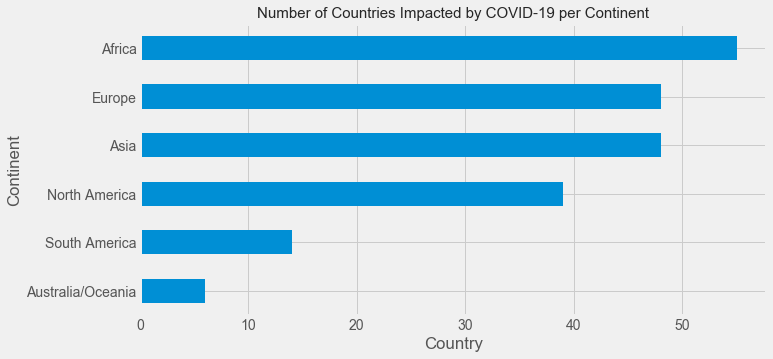

In [266]:
# Filter out the continent column
plt.figure(figsize= (10, 5))
worldwide['continent'].value_counts().sort_values()[1:].plot.barh()
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Number of Countries Impacted by COVID-19 per Continent', fontsize = 15);

### Which continent has the highest total cases, total deaths and total recovered?

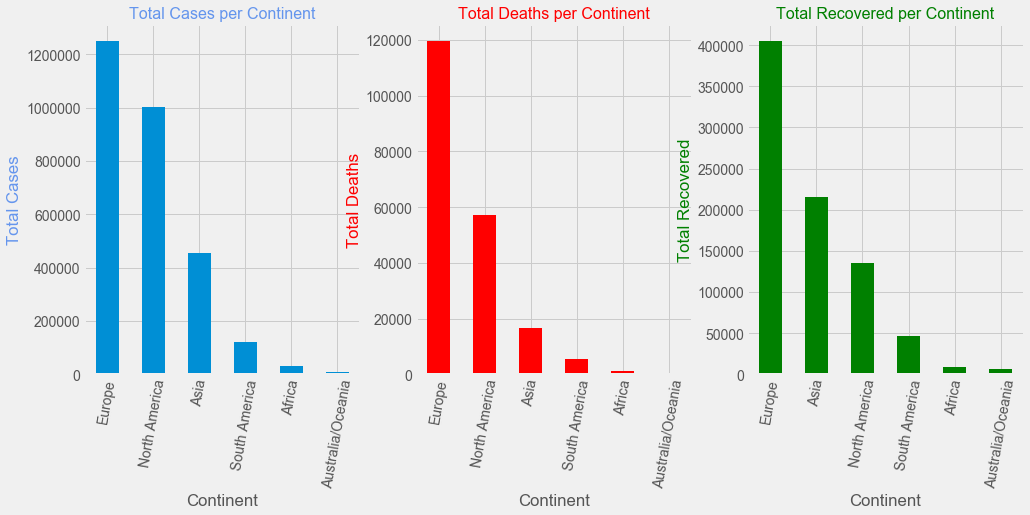

In [267]:

con =worldwide.groupby('continent').sum()
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
con.total_cases.sort_values(ascending = False)[:-1].plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.xlabel('Continent')
plt.title('Total Cases per Continent', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
con.total_deaths.sort_values(ascending = False)[:-1].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.xlabel('Continent')
plt.title('Total Deaths per Continent', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
con.total_recovered.sort_values(ascending = False)[:-1].plot.bar(color = 'g')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'g')
plt.xlabel('Continent')
plt.title('Total Recovered per Continent', fontsize= 16, color = 'g' );

### What are the top 10 countries in the world with the highest total cases, total deaths and total recovered?

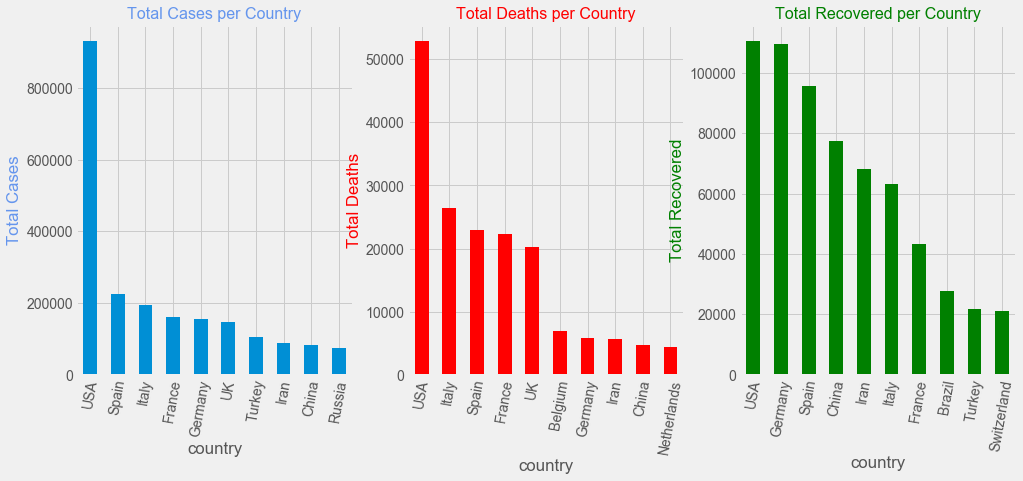

In [268]:
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
worldwide["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per Country', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
worldwide.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per Country', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
worldwide.total_recovered.sort_values(ascending = False)[:10].plot.bar(color = 'g')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'g')
plt.title('Total Recovered per Country', fontsize= 16, color = 'g' );

### What are the top 10  USA States with the highest total cases and total deaths ?

In [269]:
# set 'usa_state' column as an index
usa.set_index('usa_state', inplace= True)

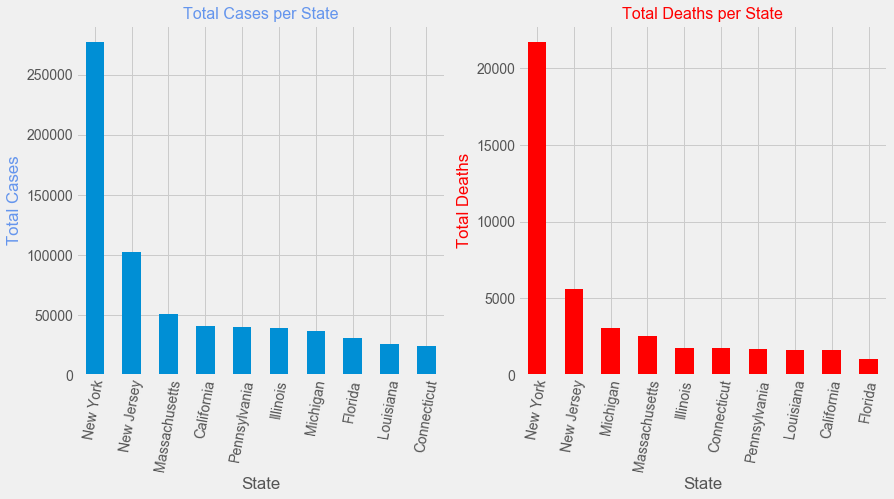

In [270]:
plt.figure(figsize= (20, 6))

# Total cases
plt.subplot(1,3, 1)
usa["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per State', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
usa.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per State', fontsize= 16, color = 'r');